In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

boston_data = pd.read_csv('boston.csv')

print("\nПервые 5 строк:")
print(boston_data.head())


Первые 5 строк:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
print("2.Проверьте, что у всех загруженных данных числовой тип.")
boston_data.info()
print("Среди dtypes только float и их 14, как и признаков.")

2.Проверьте, что у всех загруженных данных числовой тип.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
Среди dtypes только float и их 14, как и признаков.


In [4]:
print("3. Проверьте, есть ли по каким-либо признакам отсутствующие данные. Если отсутствующие данные есть – заполните их медианным значением.")
boston_data.info()

print("Non-null count у каждого признака равен 506, как и количество строк, значит, отсутствующих данных нет.")

3. Проверьте, есть ли по каким-либо признакам отсутствующие данные. Если отсутствующие данные есть – заполните их медианным значением.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
Non-null count у каждого признака равен 506, как и количество строк, значит, отсутствующих данных нет.


In [5]:
print("4. Посчитайте коэффициент корреляции для всех пар признаков. Подсказка: воспользуйтесь методом corr() для датафрейма, чтобы получить сразу всю корреляционную матрицу.")
correlation_matrix = boston_data.corr() #выч коэф корреляции Пирсона между всеми парами числ столб
print(correlation_matrix)

4. Посчитайте коэффициент корреляции для всех пар признаков. Подсказка: воспользуйтесь методом corr() для датафрейма, чтобы получить сразу всю корреляционную матрицу.
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.31

5. С помощью одной из библиотек визуализации постройте тепловую карту (heatmap) по корреляционной матрице.


<Axes: >

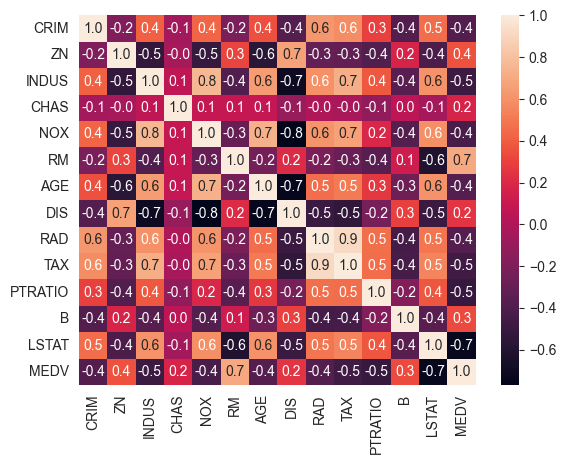

In [6]:
print("5. С помощью одной из библиотек визуализации постройте тепловую карту (heatmap) по корреляционной матрице.")
sns.heatmap(correlation_matrix, annot=True, fmt=".1f")

In [7]:
print('''6. Выберите от 4 до 6 признаков, наиболее подходящих для анализа (на свое усмотрение, выбор обоснуйте), которые в наибольшей степени коррелируют с целевым признаком (ценой недвижимости).
RM - среднее количество комнат в доме, имеет положительную корреляцию 0.7 - чем больше комнат, тем просторнее жилье и выше его стоимость

LSTAT - процент населения с низким социальным статусом, имеет отрицательную корреляцию -0.7 - районы с более высоким процентом малообеспеченного населения имеют более низкие цены на недвижимость

PTRATIO - соотношение количества учеников и учителей, имеет отрицательную корреляцию -0.51 - для семей важно качество образования, поэтому районы с лучшими школами (низким PTRATIO) ценятся выше

DIS - взвешенные расстояния до центров занятости, имеет положительную корреляцию 0.25 - чем ближе к рабочим центрам, тем удобнее транспортная доступность и выше стоимость жилья

CRIM - уровень преступности, имеет отрицательную корреляцию -0.39 - безопасность района является ключевым фактором при выборе жилья

NOX - концентрация оксидов азота, имеет отрицательную корреляцию -0.43 - качество воздуха и экологическая обстановка значительно влияют на стоимость недвижимости''')


6. Выберите от 4 до 6 признаков, наиболее подходящих для анализа (на свое усмотрение, выбор обоснуйте), которые в наибольшей степени коррелируют с целевым признаком (ценой недвижимости).
RM - среднее количество комнат в доме, имеет положительную корреляцию 0.7 - чем больше комнат, тем просторнее жилье и выше его стоимость

LSTAT - процент населения с низким социальным статусом, имеет отрицательную корреляцию -0.7 - районы с более высоким процентом малообеспеченного населения имеют более низкие цены на недвижимость

PTRATIO - соотношение количества учеников и учителей, имеет отрицательную корреляцию -0.51 - для семей важно качество образования, поэтому районы с лучшими школами (низким PTRATIO) ценятся выше

DIS - взвешенные расстояния до центров занятости, имеет положительную корреляцию 0.25 - чем ближе к рабочим центрам, тем удобнее транспортная доступность и выше стоимость жилья

CRIM - уровень преступности, имеет отрицательную корреляцию -0.39 - безопасность района является ключевым 

7. Для каждого из выбранных признаков в паре с целевым признаком постройте точечную диаграмму (диаграмму рассеяния).


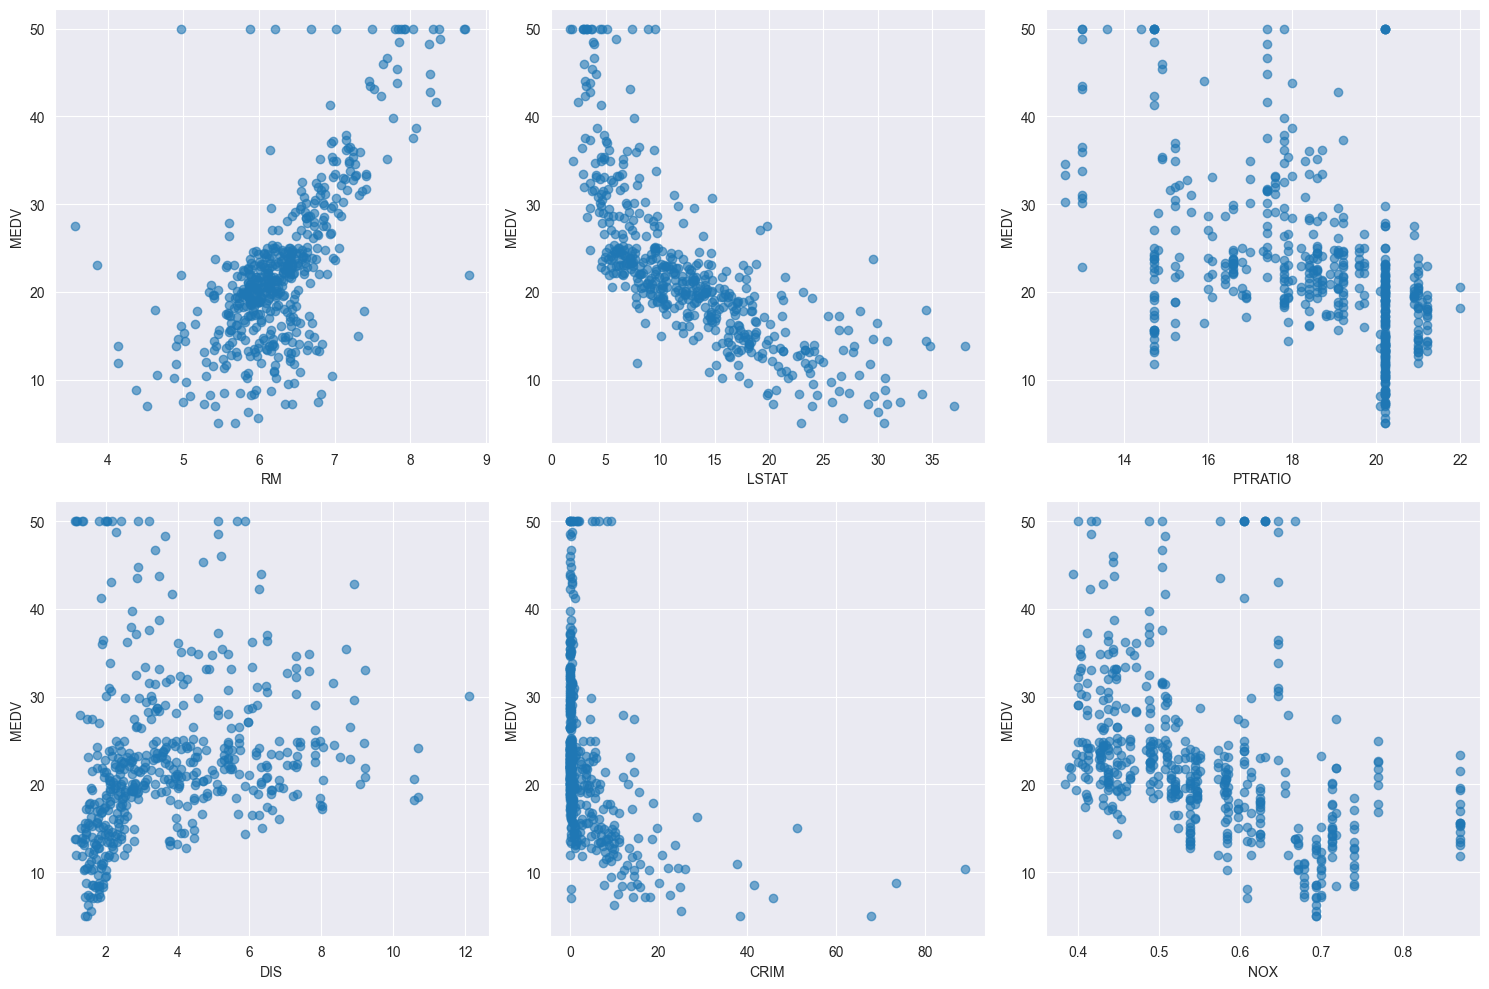

In [8]:
print("7. Для каждого из выбранных признаков в паре с целевым признаком постройте точечную диаграмму (диаграмму рассеяния).")
features = ['RM', 'LSTAT', 'PTRATIO', 'DIS', 'CRIM', 'NOX']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel() #преобразует двумерный массив 2×3 в плоский одномерный массив из 6 элементов для удобного перебора

for i, feature in enumerate(features):
    axes[i].scatter(boston_data[feature], boston_data['MEDV'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MEDV')

plt.tight_layout()
plt.show()

In [9]:
print('''8. Визуально убедитесь, что связь между выбранным признаком и целевым прослеживается. Если на основе графика считаете, что зависимости нет – исключите этот признак из дальнейшего рассмотрения (но при этом как минимум 3 признака должно остаться в любом случае, если не получается выбрать три признака, вернитесь к шагу 6).

Выбираем признаки RM и LSTAT. Помимо них возьмем PTRATIO, зависимость не самая сильная, но все равно прослеживается. ''')

8. Визуально убедитесь, что связь между выбранным признаком и целевым прослеживается. Если на основе графика считаете, что зависимости нет – исключите этот признак из дальнейшего рассмотрения (но при этом как минимум 3 признака должно остаться в любом случае, если не получается выбрать три признака, вернитесь к шагу 6).

Выбираем признаки RM и LSTAT. Помимо них возьмем PTRATIO, зависимость не самая сильная, но все равно прослеживается. 


In [10]:
print("9. Сформируйте список факторных признаков и целевую переменную.")
# Факторные признаки
X = boston_data[['RM', 'LSTAT', 'PTRATIO']]

# Целевая переменная
y = boston_data['MEDV']

9. Сформируйте список факторных признаков и целевую переменную.


In [11]:
print("10. Выполните разбиение датасета на обучающую и тестовую выборки в соотношении 8:2. При формировании обучающей и тестовой выборок строки из исходного датафрейма должны выбираться в случайном порядке. Подсказка: можно воспользоваться функцией train_test_split из библиотеки sklearn.model_selection.")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

10. Выполните разбиение датасета на обучающую и тестовую выборки в соотношении 8:2. При формировании обучающей и тестовой выборок строки из исходного датафрейма должны выбираться в случайном порядке. Подсказка: можно воспользоваться функцией train_test_split из библиотеки sklearn.model_selection.


In [12]:
print("11. Из набора линейных моделей библиотеки sklearn возьмите линейную регрессию, обучите ее на обучающем наборе.")
lr_model = LinearRegression() #конструктор класса линейной регрессии из sklearn
lr_model.fit(X_train, y_train)

11. Из набора линейных моделей библиотеки sklearn возьмите линейную регрессию, обучите ее на обучающем наборе.


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
print("12. Получите векторы прогнозных значений целевой переменной на обучающей и на тестовой выборках.")
train_predict = lr_model.predict(X_train) #данные, на которых модель обучалась
test_predict = lr_model.predict(X_test) #данные, которые модель не видела при обучении

print(train_predict)
print()
print(test_predict)

12. Получите векторы прогнозных значений целевой переменной на обучающей и на тестовой выборках.
[ 9.11093926 20.3553657  25.24523907 13.97124476 18.2338983  26.43692676
 22.31134243 27.80313815 12.42084977 19.65676226 24.37266236 24.10355224
 31.22965673 19.09428435 33.17200502 14.63639078 19.2820046  28.55894581
 18.5284469  26.68168554 14.76523558 23.01472168 26.20450893 23.02714078
 27.60438177 31.71672774 23.67211976 38.11297967 10.25633124 27.0129325
 18.93768258 19.51418834 11.36395318 21.94554631 22.1363081  32.87895597
 31.15572337 16.35875069 17.60875169 30.23711725 23.36846062 11.51902977
  8.82995619 23.62816826 23.50194545 17.6040442  13.78086389 39.91631538
 19.62355316 18.58615857 27.13865255 22.79255599 21.30672641 21.92547857
 16.02445236 24.21696586 31.22803953 12.07514407 22.04958454 18.36965974
 19.65385065 25.15044992 24.81754006 22.50857327 41.39248147 17.35884261
 16.65619211 20.99500485 19.1032113  21.44419257 21.82492838 33.48933934
 20.68334042 19.40435882 24.

In [14]:
print("13. Посчитайте коэффициент детерминации (R2) и корень из среднеквадратичной ошибки (RMSE) на обучающей и на тестовой выборках. проанализируйте полученные данные. Если данные не удовлетворительные, вернитесь к шагу 6")
r2_train = r2_score(y_train, train_predict) #какую долю дисперсии целевой переменной объясняет модель
r2_test = r2_score(y_test, test_predict)

print(f"Коэффициент детерминации обучающей выборки: {r2_train:.2f}") #уже изуч дан
print(f"Коэффициент детерминации тестовой выборки: {r2_test:.2f}") #новые данные

rmse_train = mean_squared_error(y_train, train_predict)**0.5 #показ ср ошибку предсказания в тех же единицах, что и целевая перем
rmse_test = mean_squared_error(y_test, test_predict)**0.5

print(f"Корень из среднеквадратичной ошибки обучающей выборки: {rmse_train:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {rmse_test:.2f}")

print("Модель объясняет около 63% изменчивости цен на недвижимость и средняя ошибка предсказания составляет примерно $5,210. Это довольно неплохой результат, модель работает удовлетворительно.")

13. Посчитайте коэффициент детерминации (R2) и корень из среднеквадратичной ошибки (RMSE) на обучающей и на тестовой выборках. проанализируйте полученные данные. Если данные не удовлетворительные, вернитесь к шагу
Коэффициент детерминации обучающей выборки: 0.69
Коэффициент детерминации тестовой выборки: 0.63
Корень из среднеквадратичной ошибки обучающей выборки: 5.22
Корень из среднеквадратичной ошибки тестовой выборки: 5.21
Модель объясняет около 63% изменчивости цен на недвижимость и средняя ошибка предсказания составляет примерно $5,210. Это довольно неплохой результат, модель работает удовлетворительно.


Доп баллы: 14. Постройте boxplot («ящик с усами») для целевого признака (MEDV). Определите, по диаграмме какие значения можно считать выбросами.


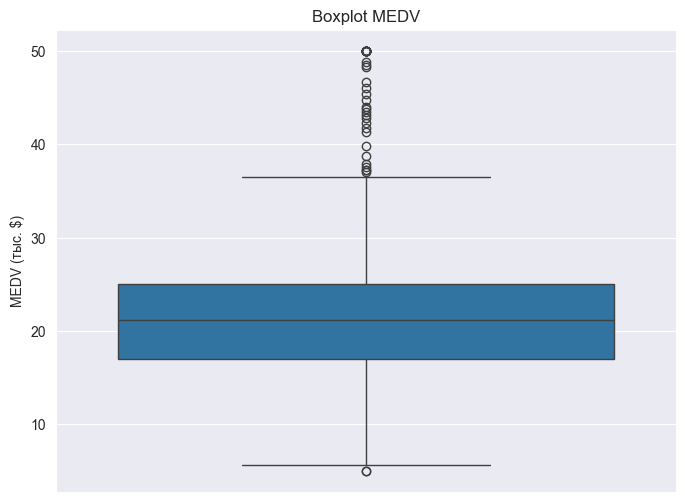

In [15]:
print("Доп баллы: 14. Постройте boxplot («ящик с усами») для целевого признака (MEDV). Определите, по диаграмме какие значения можно считать выбросами.")
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_data['MEDV'])
plt.title('Boxplot MEDV')
plt.ylabel('MEDV (тыс. $)')
plt.show()

In [17]:
print("15. Отфильтруйте исходные данные, удалив выбросы. Пересоздайте тестовую и обучающую выборки, переобучите модель. Посчитайте показатели R2 и RMSE. Как они изменились? О чем это говорит?")
Q1 = boston_data['MEDV'].quantile(0.25) #значения, ниже которого находятся 25% всех данных
Q3 = boston_data['MEDV'].quantile(0.75)
IQR = Q3 - Q1 #межквартильный размах
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = boston_data[(boston_data['MEDV'] >= lower_bound) & (boston_data['MEDV'] <= upper_bound)] #Фильтрация данных - создаём новый DataFrame только со строками, где MEDV находится между нижней и верхней границами

X_f = filtered_data[['RM', 'LSTAT', 'PTRATIO']] #Создание матрицы признаков из отфильтрованных данных
y_f = filtered_data['MEDV'] #Создание целевой переменной из отфильтрованных данных

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_f, y_f, test_size=0.2, random_state=42 #Разделение отфильтрованных данных на обучающую и тестовую выборки в соотношении 80:20
)

model_f = LinearRegression() #Создание новой модели линейной регрессии
model_f.fit(X_train_f, y_train_f) #Обучение модели на отфильтрованных обучающих данных

train_pred_f = model_f.predict(X_train_f) #Получение прогнозов для обучающей выборки
test_pred_f = model_f.predict(X_test_f) #Получение прогнозов для тестовой выборки

r2_train_f = r2_score(y_train_f, train_pred_f) #Вычисление R² для обучающей выборки после удаления выбросов
r2_test_f = r2_score(y_test_f, test_pred_f) #
rmse_train_f = (mean_squared_error(y_train_f, train_pred_f))**0.5 #Вычисление RMSE для обучающей выборки
rmse_test_f = (mean_squared_error(y_test_f, test_pred_f))**0.5

print("После удаления выбросов: ")
print(f"Коэффициент детерминации обучающей выборки: {r2_train_f:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {r2_test_f:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {rmse_train_f:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {rmse_test_f:.2f}")

print("\nДо удаления выбросов: ")
print(f"Коэффициент детерминации обучающей выборки: {r2_train:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {r2_test:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {rmse_train:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {rmse_test:.2f}")
print("После удаления выбросов модель стала намного лучше: R² вырос с 0.63 до 0.70, а ошибка уменьшилась с $5,210 до $3,490. Это лучшая модель для прогнозирования цен на типичную недвижимость.")

15. Отфильтруйте исходные данные, удалив выбросы. Пересоздайте тестовую и обучающую выборки, переобучите модель. Посчитайте показатели R2 и RMSE. Как они изменились? О чем это говорит?
После удаления выбросов: 
Коэффициент детерминации обучающей выборки: 0.67
Коэффициент детерминации тестовой выборки: 0.70
Корень из среднеквадратичной ошибки обучающей выборки: 3.69
Корень из среднеквадратичной ошибки тестовой выборки: 3.49

До удаления выбросов: 
Коэффициент детерминации обучающей выборки: 0.69
Коэффициент детерминации тестовой выборки: 0.63
Корень из среднеквадратичной ошибки обучающей выборки: 5.22
Корень из среднеквадратичной ошибки тестовой выборки: 5.21
После удаления выбросов модель стала намного лучше: R² вырос с 0.63 до 0.70, а ошибка уменьшилась с $5,210 до $3,490. Это лучшая модель для прогнозирования цен на типичную недвижимость.


In [19]:
print("16. Из набора линейных моделей библиотеки sklearn возьмите гребневую регрессию (Ridge). Обучите модель. Посчитайте показатели R2 и RMSE. проанализируйте")
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train) #Обучение гребневой регрессии на исходных данных (с выбросами)

train_pred_ridge = ridge_model.predict(X_train) #Прогнозы на обучающей выборке для гребневой регрессии
test_pred_ridge = ridge_model.predict(X_test)

r2_train_ridge = r2_score(y_train, train_pred_ridge) #R² для обучающей выборки гребневой регрессии
r2_test_ridge = r2_score(y_test, test_pred_ridge)
rmse_train_ridge = (mean_squared_error(y_train, train_pred_ridge))**0.5 #RMSE для обучающей выборки гребневой регрессии
rmse_test_ridge = (mean_squared_error(y_test, test_pred_ridge))**0.5

print("Гребневая регрессия")
print(f"Коэффициент детерминации обучающей выборки: {r2_train_ridge:.3f}")
print(f"Коэффициент детерминации тестовой выборки:  {r2_test_ridge:.3f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {rmse_train_ridge:.3f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки:  {rmse_test_ridge:.3f}")

print("\nЛинейная регрессия: ")
print(f"Коэффициент детерминации обучающей выборки: {r2_train:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {r2_test:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {rmse_train:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {rmse_test:.2f}")
print("Гребневая регрессия не улучшила результаты, что говорит о хорошем качестве исходных данных и правильно выбранных признаках.")

16. Из набора линейных моделей библиотеки sklearn возьмите гребневую регрессию (Ridge). Обучите модель. Посчитайте показатели R2 и RMSE. проанализируйте
Гребневая регрессия
Коэффициент детерминации обучающей выборки: 0.686
Коэффициент детерминации тестовой выборки:  0.631
Корень из среднеквадратичной ошибки обучающей выборки: 5.219
Корень из среднеквадратичной ошибки тестовой выборки:  5.203

Линейная регрессия: 
Коэффициент детерминации обучающей выборки: 0.69
Коэффициент детерминации тестовой выборки: 0.63
Корень из среднеквадратичной ошибки обучающей выборки: 5.22
Корень из среднеквадратичной ошибки тестовой выборки: 5.21
Гребневая регрессия не улучшила результаты, что говорит о хорошем качестве исходных данных и правильно выбранных признаках.


In [20]:
print("17. Постройте полиномиальную регрессию с использованием полинома 3й степени. Посчитайте показатели R2 и RMSE. Сравните все полученные результаты. Сделайте вывод.")
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)), #создание полиномиальных признаков 3-й степени, не добавлять столбец с единицами
    ('linear', LinearRegression()) #линейная регрессия на полиномиальных признаках
])

poly_model.fit(X_train, y_train) #Обучение полиномиальной модели на обучающих данных

train_pred_poly = poly_model.predict(X_train) #Прогнозы на обучающей выборке для полиномиальной регрессии
test_pred_poly = poly_model.predict(X_test)

r2_train_poly = r2_score(y_train, train_pred_poly) #R² для обучающей выборки полиномиальной регрессии
r2_test_poly = r2_score(y_test, test_pred_poly)
rmse_train_poly = (mean_squared_error(y_train, train_pred_poly))**0.5 #RMSE для обучающей выборки полиномиальной регрессии
rmse_test_poly = (mean_squared_error(y_test, test_pred_poly))**0.5

print("Полиномиальная регрессия: ")
print(f"Коэффициент детерминации обучающей выборки: {r2_train_poly:.3f}")
print(f"Коэффициент детерминации тестовой выборки:  {r2_test_poly:.3f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {rmse_train_poly:.3f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки:  {rmse_test_poly:.3f}")

print("\nЛинейная регрессия: ")
print(f"Коэффициент детерминации обучающей выборки: {r2_train:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {r2_test:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {rmse_train:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {rmse_test:.2f}")
print("Полиномиальная регрессия показала сильное переобучение: отличные результаты на обучающих данных (R²=0.822), но плохие на тестовых (R²=0.613). Модель нельзя использовать на практике.")

17. Постройте полиномиальную регрессию с использованием полинома 3й степени. Посчитайте показатели R2 и RMSE. Сравните все полученные результаты. Сделайте вывод.
Полиномиальная регрессия: 
Коэффициент детерминации обучающей выборки: 0.822
Коэффициент детерминации тестовой выборки:  0.613
Корень из среднеквадратичной ошибки обучающей выборки: 3.933
Корень из среднеквадратичной ошибки тестовой выборки:  5.327

Линейная регрессия: 
Коэффициент детерминации обучающей выборки: 0.69
Коэффициент детерминации тестовой выборки: 0.63
Корень из среднеквадратичной ошибки обучающей выборки: 5.22
Корень из среднеквадратичной ошибки тестовой выборки: 5.21
Полиномиальная регрессия показала сильное переобучение: отличные результаты на обучающих данных (R²=0.822), но плохие на тестовых (R²=0.613). Модель нельзя использовать на практике.
